In [1]:
import pandas as pd
import quandl

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [3]:
aapl = quandl.get("WIKI/AAPL.11",start_date=start,end_date=end)
googl = quandl.get("WIKI/AAPL.11",start_date=start,end_date=end)
tesla = quandl.get("WIKI/AAPL.11",start_date=start,end_date=end)
amaz = quandl.get("WIKI/AMZN.11",start_date=start,end_date=end)

In [5]:
for stock_df in (aapl,googl,tesla,amaz):
    stock_df['Normed Ret']=stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']
# creating new coumln by dividing rows Adj close price by first row close price

In [8]:
aapl.head()

,Adj. Close,Normed Ret
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [9]:
# allocation 30% aapl, 20% tesla, 40% amazon, 10% googl
for stock_df, allo in zip((aapl,googl,tesla,amaz),[.3,.1,.2,.4]):
    stock_df['Allocation']= stock_df['Normed Ret']*allo

In [11]:
aapl.head()# you can see actual allocation

,Adj. Close,Normed Ret,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [12]:
for stock_df in (aapl,googl,tesla,amaz):
    stock_df['Position']=stock_df['Allocation']*1000000

In [14]:
aapl.head()

,Adj. Close,Normed Ret,Allocation,Position
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [15]:
all_pos_val = [aapl['Position'],googl['Position'],tesla['Position'],amaz['Position']]
portfal_val = pd.concat(all_pos_val,axis=1)

In [16]:
portfal_val.head()

,Position,Position,Position,Position
Date,,,,
2012-01-03,300000.000000,100000.000000,200000.000000,400000.000000
2012-01-04,301612.236461,100537.412154,201074.824308,396603.921131
2012-01-05,304960.727573,101653.575858,203307.151716,396827.347372
2012-01-06,308148.724558,102716.241519,205432.483039,407998.659443
2012-01-09,307659.946988,102553.315663,205106.631326,398949.896665


In [17]:
portfal_val.columns = ['AAPL Pos','GOOGL Pos','Tesla Pos','AMZN Pos']

In [18]:
portfal_val.head()

,AAPL Pos,GOOGL Pos,Tesla Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,100000.000000,200000.000000,400000.000000
2012-01-04,301612.236461,100537.412154,201074.824308,396603.921131
2012-01-05,304960.727573,101653.575858,203307.151716,396827.347372
2012-01-06,308148.724558,102716.241519,205432.483039,407998.659443
2012-01-09,307659.946988,102553.315663,205106.631326,398949.896665


In [19]:
portfal_val['Tot Pos']= portfal_val.sum(axis=1)

In [20]:
portfal_val.head()

,AAPL Pos,GOOGL Pos,Tesla Pos,AMZN Pos,Tot Pos
Date,,,,,
2012-01-03,300000.000000,100000.000000,200000.000000,400000.000000,1.000000e+06
2012-01-04,301612.236461,100537.412154,201074.824308,396603.921131,9.998284e+05
2012-01-05,304960.727573,101653.575858,203307.151716,396827.347372,1.006749e+06
2012-01-06,308148.724558,102716.241519,205432.483039,407998.659443,1.024296e+06
2012-01-09,307659.946988,102553.315663,205106.631326,398949.896665,1.014270e+06


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Total Portfolia value')

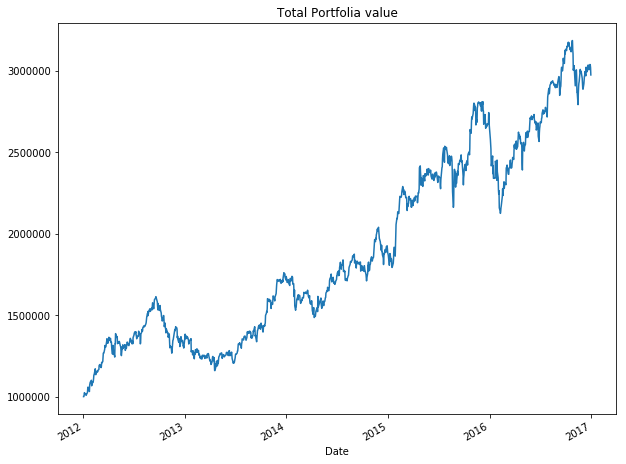

In [25]:
portfal_val['Tot Pos'].plot(figsize=(10,8))
plt.title('Total Portfolia value')

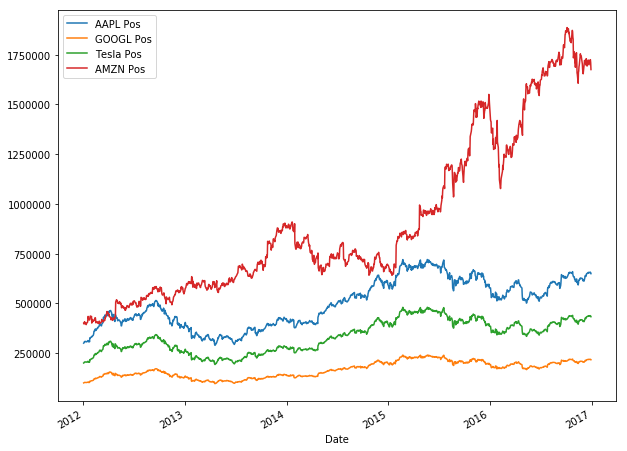

In [26]:
portfal_val.drop('Tot Pos',axis=1).plot(figsize=(10,8))

In [28]:
## POrtfolio statistics
portfal_val['Daily Ret']= portfal_val['Tot Pos'].pct_change(1)

In [29]:
portfal_val.head()

,AAPL Pos,GOOGL Pos,Tesla Pos,AMZN Pos,Tot Pos,Daily Ret
Date,,,,,,
2012-01-03,300000.000000,100000.000000,200000.000000,400000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,100537.412154,201074.824308,396603.921131,9.998284e+05,-0.000172
2012-01-05,304960.727573,101653.575858,203307.151716,396827.347372,1.006749e+06,0.006922
2012-01-06,308148.724558,102716.241519,205432.483039,407998.659443,1.024296e+06,0.017430
2012-01-09,307659.946988,102553.315663,205106.631326,398949.896665,1.014270e+06,-0.009788


In [30]:
portfal_val['Daily Ret'].mean()

0.000966578307159231

In [31]:
portfal_val['Daily Ret'].std()

0.014091707473691465

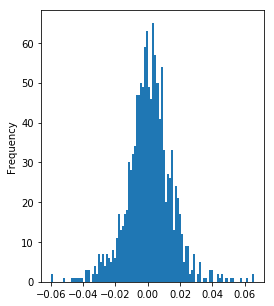

In [33]:
portfal_val['Daily Ret'].plot(kind='hist',bins=100,figsize=(4,5))

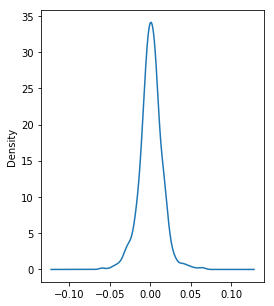

In [34]:
portfal_val['Daily Ret'].plot(kind='kde',figsize=(4,5))

In [35]:
cumalative_ret = 100* (portfal_val['Tot Pos'][-1]/portfal_val['Tot Pos'][0]-1)

In [36]:
cumalative_ret

197.40865478609484

In [37]:
# Risk free return assumed here to be 0 then SR is Rp/Sigmap
SR = portfal_val['Daily Ret'].mean()/portfal_val['Daily Ret'].std()

In [38]:
SR

0.06859199348012197

In [39]:
## Annual sharpe ratio Daily ration * sqrt(252)
ASR = (252**0.5)*SR

In [40]:
ASR

1.0888641400713994